<a href="https://colab.research.google.com/github/GUmarEla/feature-_detection/blob/main/01_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDGE DETECTION ALGORITHMS**

we built five edge detection algorithms
Sobel, Prewitt, Roberts, Canny, and Laplacien of gaussian

kerel_size is used to choose the dimension of the kernel to be used in gaussian blurring steps (the first step of all the five algorithm)

    sobel(image, kernel_size, alpha)
    prewitt(image, kernel_size, alpha)
    roberts(image, kernel_size, alpha)
    canny(image, kernel_size, alpha, beta)
    def LoG(image, sigma, kernel_type)
 kernel_type is (**0** for kernel_4_connected , or **1** for kernel_8_connected)

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image

In [2]:
# Import necessary libraries
import numpy as np
import requests
import cv2

# Define the image URL
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2N9OK2YKfUJp-zElKfTpuBbrUSfn1YFqp7A&s'

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the images
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# **Edge detection Algorithms**

## **Sobel**

In [72]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def sobel(image, kernel_size, alpha):
  epsilon = 1e-04

  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(kernel_size, kernel_size), 0)

  # Define sobel kernels
  sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  sobel_kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  dim = sobel_kernel_x.shape[0] // 2

  # Gradient convolution image with sobel kernel Sx, Sy
  gradient_x = convolve2d(image, sobel_kernel_x).astype(np.float64)[dim:-dim, dim:-dim]
  gradient_y = convolve2d(image, sobel_kernel_y).astype(np.float64)[dim:-dim, dim:-dim]

  # turn zero values to small values to avoid division by zero
  gradient_x[gradient_x == 0] = epsilon

  # Calculate gradient magnitude and direction (angle)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_angle = np.arctan(gradient_y, gradient_x)

  # Calculate threshold
  threshold = alpha * gradient_magnitude.max()

  image_result = np.zeros_like(image)
  image_result[gradient_magnitude > threshold] = 1
  image_result.astype(np.uint8)

  return image_result

(-0.5, 231.5, 216.5, -0.5)

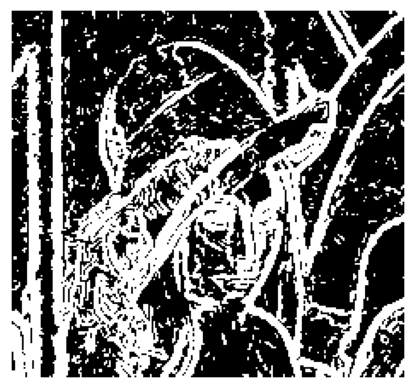

In [73]:
plt.imshow(sobel(image_gray, kernel_size= 5, alpha= .05), cmap='gray')
plt.axis('off')

(-0.5, 231.5, 216.5, -0.5)

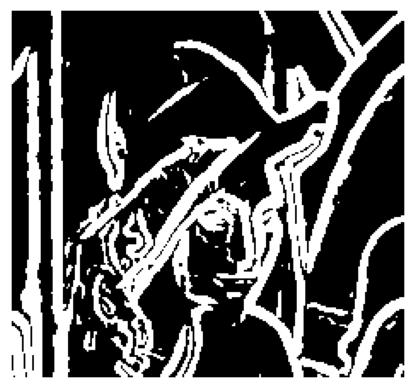

In [ ]:
plt.imshow(sobel(image_gray, kernel= 9, alpha= .05), cmap='gray')
plt.axis('off')

## Prewitt

In [74]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def prewitt(image, kernel_size, alpha):
  epsilon = 1e-04

  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(kernel_size, kernel_size), 0)

  # Define prewitt kernels
  prewitt_kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  prewitt_kernel_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  dim = prewitt_kernel_x.shape[0] // 2

  # Gradient convolution image with sobel kernel Sx, Sy
  gradient_x = convolve2d(image, prewitt_kernel_x).astype(np.float64)[dim:-dim, dim:-dim]
  gradient_y = convolve2d(image, prewitt_kernel_y).astype(np.float64)[dim:-dim, dim:-dim]

  # turn zero values to small values to avoid division by zero
  gradient_x[gradient_x == 0] = epsilon

  # Calculate gradient magnitude and direction (angle)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_angle = np.arctan(gradient_y, gradient_x)

  # Calculate threshold
  threshold = alpha * gradient_magnitude.max()

  image_result = np.where(gradient_magnitude > threshold, 1, 0)
  image_result = image_result.astype(np.uint8)

  return image_result

(-0.5, 231.5, 216.5, -0.5)

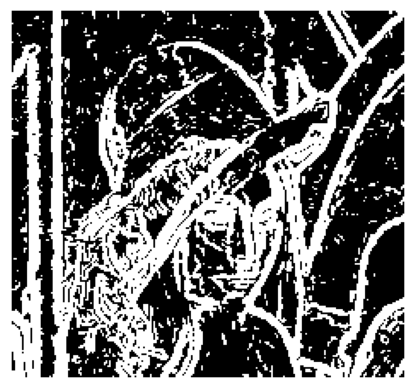

In [75]:
plt.imshow(prewitt(image_gray, kernel_size= 5, alpha= .05), cmap='gray')
plt.axis('off')

## Roberts

In [76]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def roberts(image, kernel_size, alpha):
  epsilon = 1e-04

  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(kernel_size, kernel_size), 0)

  # Define roberts kernels
  roberts_kernel_x = np.array([[1,0],[0,-1]])
  roberts_kernel_y = np.array([[0,1],[-1,0]])
  dim = roberts_kernel_x.shape[0] // 2

  # Gradient convolution image with sobel kernel Sx, Sy
  gradient_x = convolve2d(image, roberts_kernel_x).astype(np.float64)[dim:-dim, dim:-dim]
  gradient_y = convolve2d(image, roberts_kernel_y).astype(np.float64)[dim:-dim, dim:-dim]

  # turn zero values to small values to avoid division by zero
  gradient_x[gradient_x == 0] = epsilon

  # Calculate gradient magnitude and direction (angle)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_angle = np.arctan(gradient_y, gradient_x)

  # Calculate threshold
  threshold = alpha * gradient_magnitude.max()

  image_result = np.where(gradient_magnitude > threshold, 1, 0)
  image_result = image_result.astype(np.uint8)

  return image_result

(-0.5, 230.5, 215.5, -0.5)

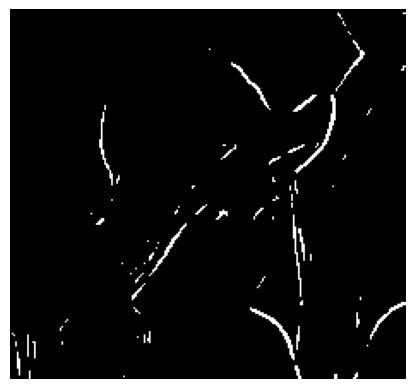

In [77]:
plt.imshow(roberts(image_gray, kernel_size=5, alpha= .5), cmap='gray')
plt.axis("off")

(-0.5, 230.5, 215.5, -0.5)

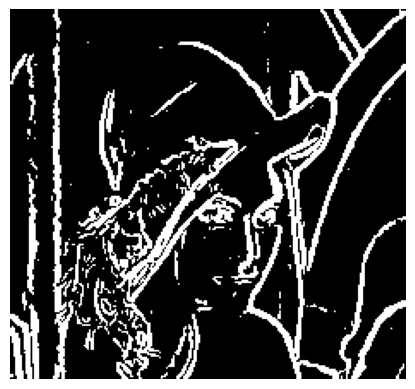

In [ ]:
plt.imshow(roberts(image_gray, kernel=5, alpha= .2), cmap='gray')
plt.axis("off")

## Canny

In [78]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def canny(image, kernel_size, alpha, beta):
  epsilon = 1e-04
  dim = kernel_size // 2
  angle_1, angle_2, angle_3, angle_4 = 22.5, 67.5, 112.5, 157.5

  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(kernel_size, kernel_size), 0)

  # Define sobel kernels
  sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  sobel_kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

  # Gradient convolution image with sobel kernel Sx, Sy
  gradient_x = convolve2d(image, sobel_kernel_x).astype(np.float64)
  gradient_y = convolve2d(image, sobel_kernel_y).astype(np.float64)

  # Calculate gradient magnitude and direction (angle)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  ## turn zero values to small values to avoid division by zero
  gradient_x[gradient_x == 0] = epsilon
  gradient_angle = np.arctan2(gradient_y, gradient_x)
  ## gradient matrix in degrees
  grdnt_dgr = np.degrees(gradient_angle)

  # Non-maximum suppression (NMS)
  nms = np.zeros((gradient_magnitude.shape))
  nms[((angle_1 <= grdnt_dgr)&(grdnt_dgr < angle_2)) | ((-angle_2 <= grdnt_dgr)&(grdnt_dgr < -angle_1))] = 45
  nms[((angle_2 <= grdnt_dgr)&(grdnt_dgr < angle_3)) | ((-angle_3 <= grdnt_dgr)&(grdnt_dgr < -angle_2))] = 90
  nms[((angle_3 <= grdnt_dgr)&(grdnt_dgr < angle_4)) | ((-angle_4 <= grdnt_dgr)&(grdnt_dgr < -angle_3))] = 135

  # Compare gradient magnitude to sides
  image_result = np.zeros((gradient_magnitude.shape))
  for i in  range(1, nms.shape[0]-1):
    for j in  range(1, nms.shape[1]-1):
      window = gradient_magnitude[i-1:i+2, j-1:j+2]
      window_c = window[1,1]
      if ((nms[i,j] == 0) and (window_c > window[1, 2]) and (window_c > window[1,0])):
        image_result[i, j] = window_c
      elif (nms[i,j] == 45) and (window_c > window[0, 2]) and (window_c > window[2, 0]):
        image_result[i, j] = window_c
      elif (nms[i,j] == 90) and (window_c > window[0, 1]) and (window_c > window[2, 1]):
        image_result[i, j] = window_c
      elif (nms[i,j] == 135) and (window_c > window[0, 0]) and (window_c > window[2, 2]):
        image_result[i, j] = window_c

  # Thresholding
  ## Calculate thresholds
  threshold_high = alpha * np.max(gradient_magnitude)
  threshold_low = beta * threshold_high
  ## Apply thresholding
  image_result[image_result > threshold_high] = 1
  image_result[(image_result < threshold_high) & (image_result > threshold_low)] = 2

  # Connecting weak and strong egdres
  for i in  range(1, nms.shape[0]-1):
    for j in  range(1, nms.shape[1]-1):
      if image_result[i, j] == 2:
        max_value = image_result[i-1:i+2, j-1:j+2].flatten().max()
        if max_value == 1:
          image_result[i, j] = 1
        else:
          image_result[i, j] = 0

  # Remove padding
  image_result = image_result[dim:-dim, dim:-dim].astype(np.uint8)

  return image_result

(-0.5, 229.5, 214.5, -0.5)

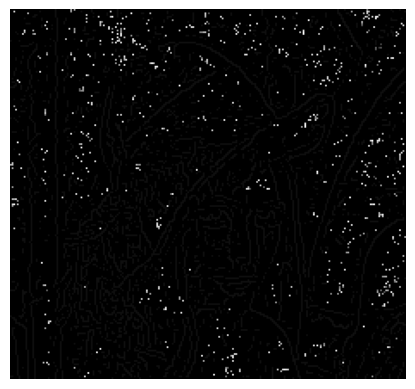

In [82]:
plt.imshow(canny(image_gray, kernel_size= 5, alpha= .05, beta= .4), cmap='gray')
plt.axis(False)

(-0.5, 229.5, 214.5, -0.5)

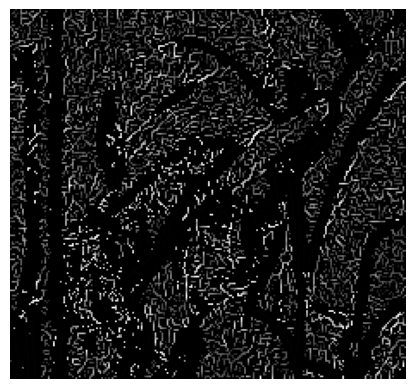

In [ ]:
can1 = canny(image_gray, kernel= 5, alpha= .2, beta = .5)

plt.imshow(can1, cmap='gray')
plt.axis(False)

## Laplacian of Gaussian (LoG)

In [83]:
def LoG(image, sigma, kernel_type):
  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(3, 3), 0)

  #Sobel kernel
  sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  # Laplacien kernel
  kernel_4_connected = np.array([[0,1,0],[1,-4,1],[0,1,0]])
  kernel_8_connected = np.array([[1,1,1],[1,-8,1],[1,1,1]])

  # Choice of type of kernel to use in and derivative
  if kernel_type == 0:
    kernel = kernel_4_connected
  else:
    kernel = kernel_8_connected

  # First convolution
  convolve_x = convolve2d(image, sobel_x).astype(np.float64)[1:-1, 1:-1]
  convolve_y = convolve2d(image, sobel_y).astype(np.float64)[1:-1, 1:-1]
  # Magnitude
  magnitude = np.sqrt(convolve_x**2 + convolve_y**2)

  # Second derivative of magnitude
  image_convolve = convolve2d(magnitude, kernel)[1:-1, 1: -1]

  # Thresholding
  T = image_convolve.max()

  image_result = np.where(image_convolve > T * sigma, 1,0).astype(np.uint8)

  return image_result

(-0.5, 231.5, 216.5, -0.5)

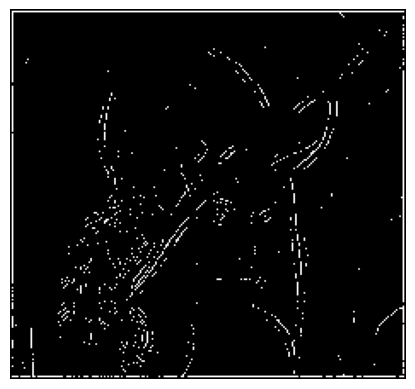

In [84]:
plt.imshow(LoG(image_gray, .2, kernel_type =0), cmap='gray')
plt.axis('off')

(-0.5, 231.5, 216.5, -0.5)

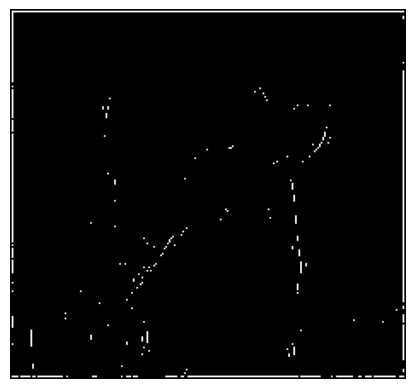

In [85]:
plt.imshow(LoG(image_gray, .3, kernel_type =1), cmap='gray')
plt.axis('off')

# Other sections

## **Laplacien of Gaussian**
this is the second wya you can impement LoG algrithm, it's less accurate

In [ ]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def LoG_2(image, sigma):
  # Convert image to Gray in case it is RGB
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Apply gaussian blur to reduce noise in image
  image = cv2.GaussianBlur(image,(3, 3), 0)

  # First-Order Derivative Kernel in the xand y directions
  derivative_x = np.array([[-1, 0, 1]])
  derivative_y = np.array([[-1], [0], [1]])

  # First derivative
  first_derivative_x = convolve2d(image, derivative_x).astype(np.float64)[:, 1: -1]
  first_derivative_y = convolve2d(image, derivative_y).astype(np.float64)[1: -1, :]

  # Secone derivative
  second_derivative_x = convolve2d(first_derivative_x, derivative_x)[:, 1: -1]
  second_derivative_y = convolve2d(first_derivative_y, derivative_y)[1: -1, :]

  # Magnitude
  image_result = np.sqrt(second_derivative_x**2 + second_derivative_y**2)

  # Thresholding
  T = image_result.max() * sigma
  image_result[image_result > T] = 1

  # result image
  image_result = image_result.astype(np.uint8)

  return image_result